<a href="https://colab.research.google.com/github/Theivaprakasham/Projects/blob/main/GMM-UBM_Mean%20adapted%20GMM%20Python%20Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 7**
Demonstrate  the mean  adapted  GMM for  an arbitrary  set  of  data
Find the % of  unadapted  Gaussians in the  class  dependent  model  compared  with the  class independent  UBM 


In [ ]:
#Import recommonended libraries
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import copy

#Uncomment this if you want to display your [graphs] within the notebook in a proper format.
%matplotlib inline
#Uncomment this if you want to display your graphs in backend


import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
from numpy.random import randn
import glob
import sys

import warnings
warnings.filterwarnings('ignore')


In [ ]:
class train_GMM:
    def returnGMM(features, NUMBER_OF_GAUSSIAN):
        gmm = GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='diag')
        gmm.fit(features)
        return gmm
    
class opt:
    def normalize_meanvector(weight, var, mean_vec):
        normalize_mean = np.zeros(np.shape(mean_vec), dtype=np.float32)
        [NUMBER_OF_GAUSSIAN, FEATURE_ORDER] = np.shape(mean_vec)
        for ii in range(0, NUMBER_OF_GAUSSIAN):
            normalize_mean[ii, :] = np.sqrt(weight[ii]) * \
                            (1 / np.sqrt(var[ii, :])) * mean_vec[ii, :]
        return normalize_mean

Sample1 shape (500, 3)
Sample2 shape (500, 3)


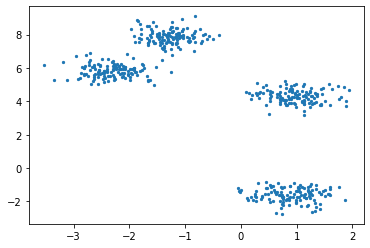

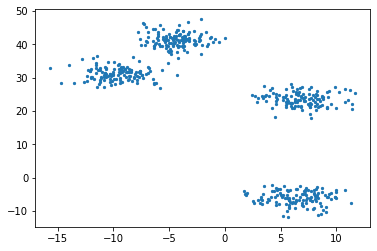

In [ ]:
# ===========================
# parameters    
# ===========================
NUMBER_OF_SAMPLE = 500
FEATURE_ORDER = 3
NUMBER_OF_GAUSSIAN = 4
RAND_VAL = 5
RAND_MEAN = 2
SCALING_FACTOR = 0.01



#Synthetic Data Generation first method

K=4 # Step1:Choose the Number of clusters

from sklearn.datasets.samples_generator import make_blobs
Data, y_true = make_blobs(n_samples=NUMBER_OF_SAMPLE, n_features=FEATURE_ORDER, centers=NUMBER_OF_GAUSSIAN,
                       cluster_std=0.4, random_state=0)




# generating Data samples
sample1 = Data
sample2 = Data * RAND_VAL + RAND_MEAN


print("Sample1 shape", sample1.shape)
print("Sample2 shape", sample2.shape)

#Plot 2D
plt.scatter(sample1[:, 0], sample1[:, 1], s=5)
plt.show()

plt.scatter(sample2[:, 0], sample2[:, 1], s=5)
plt.show()

In [ ]:
# training init GMM to create UBM
GMM_train_by_sample1 = train_GMM.returnGMM(sample1, NUMBER_OF_GAUSSIAN) 


##Posterior Probability of Noisy Dataset :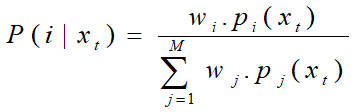

In [ ]:
# Posterior probabilities for K NUMBER_OF_GAUSSIAN
probability = GMM_train_by_sample1.predict_proba(sample2)
print(probability.shape)

(500, 4)


ni: 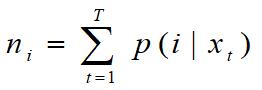

In [ ]:
#N summation for K NUMBER_OF_GAUSSIAN
n_i = np.sum(probability, axis=0)
print(n_i)

[1.24000032e+002 3.74000341e+002 5.84802809e-119 1.99962698e+000]


Mean of Posterior Probaility on Noisy Image: 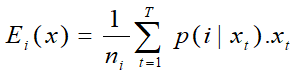

In [ ]:

E = np.zeros((FEATURE_ORDER, NUMBER_OF_GAUSSIAN), dtype=np.float32)
print('Size of E', E.shape)

for ii in range(0, NUMBER_OF_GAUSSIAN):
    probability_gauss = np.tile(probability[:, ii],(FEATURE_ORDER, 1)).T * sample2
    E[:, ii] = np.sum(probability_gauss, axis=0) / n_i[ii]

print('probability_gauss: ', probability_gauss.shape)
print('Size of E', E.shape)

Size of E (3, 4)
probability_gauss:  (500, 3)
Size of E (3, 4)


Data dependent adaptation coefficient: 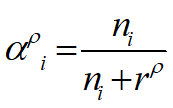

In [ ]:
alpha = n_i / (n_i + SCALING_FACTOR)
print('alpha: ', alpha)

alpha:  [9.99919361e-001 9.99973263e-001 5.84802809e-117 9.95023952e-001]


In [ ]:
old_mean = copy.deepcopy(GMM_train_by_sample1.means_)
print('old_mean: ', old_mean )
new_mean = np.zeros((NUMBER_OF_GAUSSIAN, FEATURE_ORDER), dtype=np.float32)
print('new mean: ', new_mean )

old_mean:  [[ 0.89272958 -1.60121752  2.87247372]
 [-1.2742891   7.88838357  9.29240676]
 [ 0.97045128  4.30899573  1.9842638 ]
 [-2.32764419  5.83847419  0.59387847]]
new mean:  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Sufficient statistics Mean Updation: 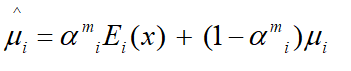

In [ ]:
# (12)
for ii in range(0, NUMBER_OF_GAUSSIAN):
    new_mean[ii,:] = (alpha[ii] * E[:,ii]) + ((1 - alpha[ii]) * old_mean[ii, :])
print('new mean: ', new_mean )

new mean:  [[ 6.4867363 -6.0353084 16.3568   ]
 [-2.3381038 31.986212  21.89106  ]
 [ 0.9704513  4.3089957  1.9842638]
 [-8.306407  28.380028  -0.6836764]]


In [ ]:
# normalize
weight = GMM_train_by_sample1.weights_
var = GMM_train_by_sample1.covariances_
print('weight: ', weight )
print('var: ', var )

weight:  [0.25 0.25 0.25 0.25]
var:  [[0.17354161 0.16618075 0.15758099]
 [0.10667278 0.17633689 0.12508475]
 [0.1585524  0.15787123 0.13973332]
 [0.15483186 0.15431736 0.14499059]]


In [ ]:
# get GMM supervector
norm_mean = opt.normalize_meanvector(weight, var, new_mean)
super_vector = np.reshape(norm_mean, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean: ', norm_mean )
print('super_vector: ', super_vector )



norm_mean_old = opt.normalize_meanvector(weight, var,old_mean)
super_vector_old = np.reshape(norm_mean_old, NUMBER_OF_GAUSSIAN * FEATURE_ORDER)
print('norm_mean_old: ', norm_mean_old )
print('super_vector_old: ', super_vector_old )

norm_mean:  [[  7.785642    -7.4025116   20.602335  ]
 [ -3.5793731   38.085636    30.948143  ]
 [  1.2185892    5.4224377    2.654113  ]
 [-10.554873    36.122303    -0.89774024]]
super_vector:  [  7.785642    -7.4025116   20.602335    -3.5793731   38.085636
  30.948143     1.2185892    5.4224377    2.654113   -10.554873
  36.122303    -0.89774024]
norm_mean_old:  [[ 1.07149   -1.963948   3.6180465]
 [-1.9507929  9.392613  13.136994 ]
 [ 1.2185892  5.4224377  2.654113 ]
 [-2.9577157  7.4312515  0.7798259]]
super_vector_old:  [ 1.07149   -1.963948   3.6180465 -1.9507929  9.392613  13.136994
  1.2185892  5.4224377  2.654113  -2.9577157  7.4312515  0.7798259]


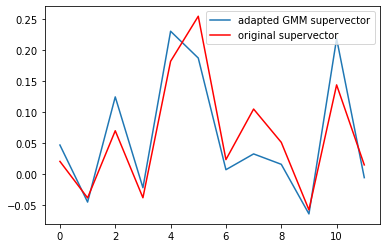

In [ ]:
plt.figure()
plt.plot(super_vector / np.sum(np.abs(super_vector)))
plt.plot(super_vector_old / np.sum(np.abs(super_vector_old)), 'r')
plt.legend(['adapted GMM supervector', 'original supervector'])

testGMM_many_mean [[ 6.46364791 -6.00608761 16.36236861]
 [ 6.85225641 23.54497867 11.92131899]
 [-4.37144548 41.44191783 48.46203378]
 [-9.63822094 31.19237096  4.96939233]]


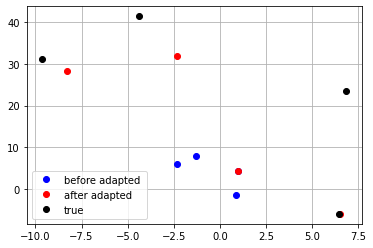

In [ ]:
# ===========================
#Verification
# ===========================
sample2_many = sample2

testGMM_many = train_GMM.returnGMM(sample2_many, NUMBER_OF_GAUSSIAN) 
testGMM_many_mean = testGMM_many.means_
print('testGMM_many_mean', testGMM_many_mean)

plt.figure()
plt.plot(old_mean[:, 0], old_mean[:, 1], 'bo')
plt.plot(new_mean[:, 0], new_mean[:, 1], 'ro')
plt.plot(testGMM_many_mean[:, 0], testGMM_many_mean[:, 1], 'ko')
plt.legend(['before adapted ', 'after adapted', 'true'])
plt.grid(True)
plt.show()